In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from numpy import array

bend_df = pd.read_csv("bend.csv")
X = bend_df.Value
le = LabelEncoder()
Y = le.fit_transform(bend_df.State)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X, Y,train_size=0.7,random_state=1)

#model.fit requires [[], [], []] format.
X_train = array(X_train).reshape(-1, 1) 
X_test = array(X_test).reshape(-1, 1) 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []

models.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=13, weights = 'uniform')))

In [4]:
for name, model in models:
    print(name)
    
    model.fit(X_train,Y_train)
    
    print("Fitting Done")
    
    Y_pred = model.predict(X_test)
    

K Nearest Neighbors
Fitting Done


C:\Users\holme\.conda\envs\ml_cpu\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


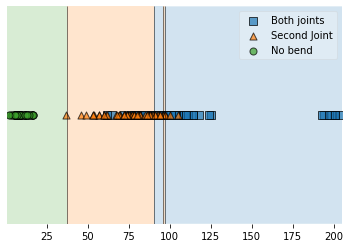

In [5]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

scatter_kwargs = {'s': 50, 'edgecolor': 'black', 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 100, 'label': 'Test data', 'alpha': 0.7}

ax = plot_decision_regions(X = X_train, 
                      y = Y_train,
#                       X_highlight=X_test,
                      clf = model,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      legend = 2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Both joints', 'Second Joint', 'No bend'], 
           framealpha=0.3, scatterpoints=1)
# plt.axis(xmin = 62, xmax = 105)

In [6]:
#Without cross validation
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8333333333333334